In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import pickle

In [2]:
chess_img = cv2.imread("chess.png")
chess_img = chess_img[:, :, [2, 1, 0]]

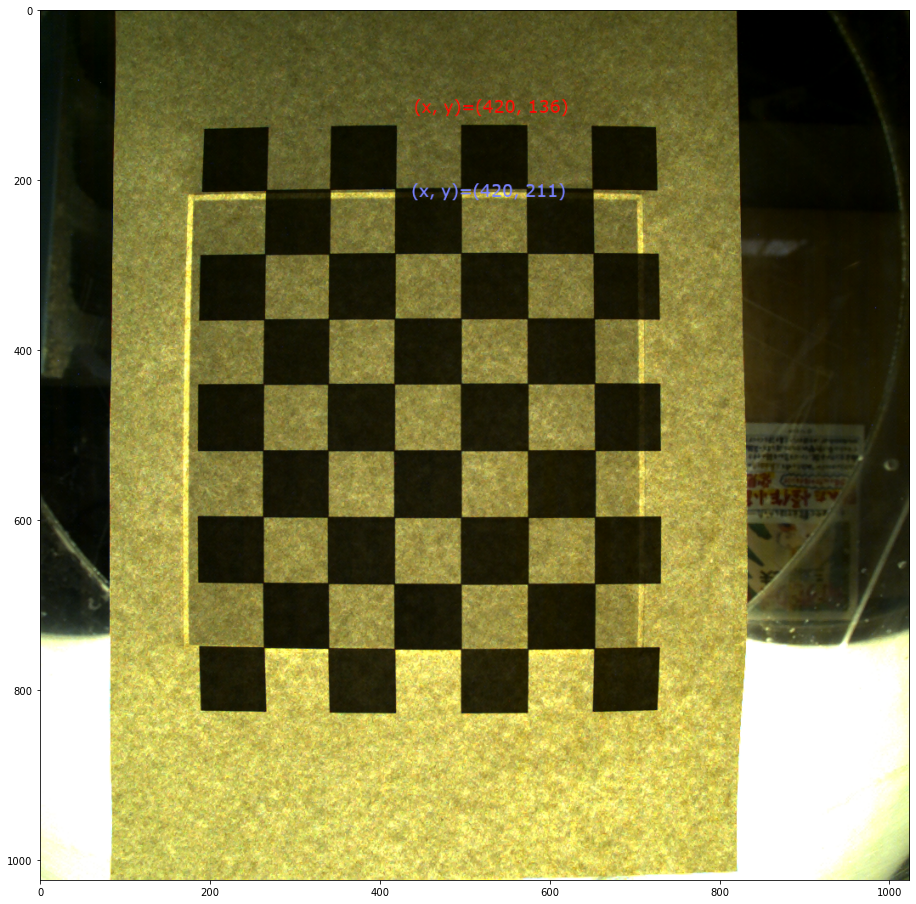

In [3]:
plt.figure(figsize=(16, 16))
plt.imshow(chess_img)
plt.show()

In [4]:
from_red_to_blue_mm = 21.5
from_red_to_blue_px = 211 - 136

mm2px = from_red_to_blue_px / from_red_to_blue_mm
px2mm = 1 / mm2px

In [5]:
from_origin_to_red_mm = 57.5  # mm
from_origin_to_red_px = from_origin_to_red_mm * mm2px

origin_x = 420
origin_y = 136 - from_origin_to_red_px

print(origin_x, origin_y)

420 -64.58139534883722


In [6]:
20 * px2mm * 50

286.6666666666667

In [7]:
fps = 50

In [8]:
#top
res1 = np.zeros((1, 4))
res2 = np.zeros((1, 4))
res3 = np.zeros((1, 4))

In [9]:
for c in range(1, 11):
    for t in range(6, 10000):
        # top
        try:
            # tmp = np.loadtxt(f"/Users/loblium/data/r/nearest_skip_5/top/rbi_q_1/{c}/{t:06}.csv", delimiter=",", skiprows=1)
            tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_1\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 0
        tmp[:, 1] += 0

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)                               # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])                                   # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])    # du_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # du_theta

        res1 = np.vstack((res1, tmp2))

<ipython-input-9-88be3d128a7d>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_1\1\000042.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_1\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-9-88be3d128a7d>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_1\1\000166.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_1\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-9-88be3d128a7d>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_1\1\000177.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_1\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-9-88be3d128a7d>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_1\1\000192.csv"
  

In [10]:
for c in range(1, 11):
    for t in range(6, 10000):
        # top
        try:
            # tmp = np.loadtxt(f"/Users/loblium/data/r/nearest_skip_5/top/rbi_q_2/{c}/{t:06}.csv", delimiter=",", skiprows=1)
            tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_2\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 0
        tmp[:, 1] += 0

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)                               # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])                                   # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])    # du_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # du_theta

        res2 = np.vstack((res2, tmp2))

<ipython-input-10-1f4f2dd3438e>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_2\1\001676.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_2\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-10-1f4f2dd3438e>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_2\1\001677.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_2\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-10-1f4f2dd3438e>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_2\1\002648.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_2\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-10-1f4f2dd3438e>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_2\1\002678.csv

In [11]:
for c in range(1, 11):
    for t in range(6, 10000):
        # top
        try:
            # tmp = np.loadtxt(f"/Users/loblium/data/r/nearest_skip_5/top/rbi_q_3/{c}/{t:06}.csv", delimiter=",", skiprows=1)
            tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_3\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 0
        tmp[:, 1] += 0

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)                               # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])                                   # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])    # du_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # du_theta

        res3 = np.vstack((res3, tmp2))

<ipython-input-11-00c5909aa4c0>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_3\1\000620.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_3\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-11-00c5909aa4c0>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_3\1\000621.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_3\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-11-00c5909aa4c0>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_3\1\000633.csv"
  tmp = np.loadtxt(f"G:\\M2\\result\\2022_04_10\\ptv_dark\\nearest_skip_5\\top\\rbi_q_3\\{c}\\{t:06}.csv", delimiter=",", skiprows=1)
<ipython-input-11-00c5909aa4c0>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_10\ptv_dark\nearest_skip_5\top\rbi_q_3\1\000635.csv

In [12]:
res1 = res1[1:]
res2 = res2[1:]
res3 = res3[1:]

In [15]:
columns = ['r', 'theta', 'u_r', 'u_theta']
res1_sort = pd.DataFrame(data=res1, columns=columns, dtype='float').sort_values(by='r', ascending=True)
res2_sort = pd.DataFrame(data=res2, columns=columns, dtype='float').sort_values(by='r', ascending=True)
res3_sort = pd.DataFrame(data=res3, columns=columns, dtype='float').sort_values(by='r', ascending=True)

In [16]:
res1_sort = res1_sort[res1_sort['r'] <= 104].values
res2_sort = res2_sort[res2_sort['r'] <= 104].values
res3_sort = res3_sort[res3_sort['r'] <= 104].values

In [17]:
with open('result/dark/res1.pickle', mode='wb') as fp:
    pickle.dump(res1_sort, fp)

with open('result/dark/res2.pickle', mode='wb') as fp:
    pickle.dump(res2_sort, fp)

with open('result/dark/res3.pickle', mode='wb') as fp:
    pickle.dump(res3_sort, fp)

In [18]:
r_ur_err_1 = np.zeros((3501, 3))
r_ur_err_2 = np.zeros((3501, 3))
r_ur_err_3 = np.zeros((3501, 3))

In [19]:
_iter = 50

In [20]:
for i in tqdm(range(0, 3501, _iter)):
    res1_sort_l = res1_sort[np.where(res1_sort[:, 0] >= i/10)]
    res1_sort_lr = res1_sort_l[np.where(res1_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_1[i, 0] = i
    r_ur_err_1[i, 1] = np.mean(res1_sort_lr, axis=0)[2]
    r_ur_err_1[i, 2] = np.std(res1_sort_lr, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
100%|██████████| 71/71 [00:00<00:00, 402.27it/s]


In [21]:
for i in tqdm(range(0, 3501, _iter)):
    res2_sort_l = res2_sort[np.where(res2_sort[:, 0] >= i/10)]
    res2_sort_lr = res2_sort_l[np.where(res2_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_2[i, 0] = i
    r_ur_err_2[i, 1] = np.mean(res2_sort_lr, axis=0)[2]
    r_ur_err_2[i, 2] = np.std(res2_sort_lr, axis=0)[2]

100%|██████████| 71/71 [00:00<00:00, 535.29it/s]


In [22]:
for i in tqdm(range(0, 3501, _iter)):
    res3_sort_l = res3_sort[np.where(res3_sort[:, 0] >= i/10)]
    res3_sort_lr = res3_sort_l[np.where(res3_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_3[i, 0] = i
    r_ur_err_3[i, 1] = np.mean(res3_sort_lr, axis=0)[2]
    r_ur_err_3[i, 2] = np.std(res3_sort_lr, axis=0)[2]

100%|██████████| 71/71 [00:00<00:00, 1343.47it/s]


In [23]:
with open('result/dark/r_ur_err_1.pickle', mode='wb') as fp:
    pickle.dump(r_ur_err_1, fp)

with open('result/dark/r_ur_err_2.pickle', mode='wb') as fp:
    pickle.dump(r_ur_err_2, fp)

with open('result/dark/r_ur_err_3.pickle', mode='wb') as fp:
    pickle.dump(r_ur_err_3, fp)

In [24]:
r_ur_ut_in_1 = np.zeros((1, 3))
r_ur_ut_in_2 = np.zeros((1, 3))
r_ur_ut_in_3 = np.zeros((1, 3))

r_ur_urErr_1 = np.zeros((3501, 3))
r_ur_urErr_2 = np.zeros((3501, 3))
r_ur_urErr_3 = np.zeros((3501, 3))

r_ut_utErr_1 = np.zeros((3501, 3))
r_ut_utErr_2 = np.zeros((3501, 3))
r_ut_utErr_3 = np.zeros((3501, 3))

r_ur_ut_in_1[:, :] = np.nan
r_ur_ut_in_2[:, :] = np.nan
r_ur_ut_in_3[:, :] = np.nan

r_ur_urErr_1[:, :] = np.nan
r_ur_urErr_2[:, :] = np.nan
r_ur_urErr_3[:, :] = np.nan

r_ut_utErr_1[:, :] = np.nan
r_ut_utErr_2[:, :] = np.nan
r_ut_utErr_3[:, :] = np.nan

In [25]:
for i in tqdm(range(0, 3501, 50)):
    res1_sort_l = res1_sort[np.where(res1_sort[:, 0] >= i/10)]
    res1_sort_lr = res1_sort_l[np.where(res1_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res1_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2], _in[:, 3]]).T
    r_ur_ut_in_1 = np.vstack([r_ur_ut_in_1, tmp])

    r_ur_urErr_1[i, 0] = i
    r_ur_urErr_1[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_1[i, 2] = np.std(tmp, axis=0)[1]

    r_ut_utErr_1[i, 0] = i
    r_ut_utErr_1[i, 1] = np.mean(tmp, axis=0)[2]
    r_ut_utErr_1[i, 2] = np.std(tmp, axis=0)[2]

 15%|█▌        | 11/71 [00:00<00:00, 98.49it/s]C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
100%|██████████| 71/71 [00:00<00:00, 187.37it/s]


In [26]:
for i in tqdm(range(0, 3501, 50)):
    res2_sort_l = res2_sort[np.where(res2_sort[:, 0] >= i/10)]
    res2_sort_lr = res2_sort_l[np.where(res2_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res2_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2], _in[:, 3]]).T
    r_ur_ut_in_2 = np.vstack([r_ur_ut_in_2, tmp])

    r_ur_urErr_2[i, 0] = i
    r_ur_urErr_2[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_2[i, 2] = np.std(tmp, axis=0)[1]

    r_ut_utErr_2[i, 0] = i
    r_ut_utErr_2[i, 1] = np.mean(tmp, axis=0)[2]
    r_ut_utErr_2[i, 2] = np.std(tmp, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
 24%|██▍       | 17/71 [00:00<00:00, 168.79it/s]C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice

In [27]:
for i in tqdm(range(0, 3501, 50)):
    res3_sort_l = res3_sort[np.where(res3_sort[:, 0] >= i/10)]
    res3_sort_lr = res3_sort_l[np.where(res3_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res3_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2], _in[:, 3]]).T
    r_ur_ut_in_3 = np.vstack([r_ur_ut_in_3, tmp])

    r_ur_urErr_3[i, 0] = i
    r_ur_urErr_3[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_3[i, 2] = np.std(tmp, axis=0)[1]

    r_ut_utErr_3[i, 0] = i
    r_ut_utErr_3[i, 1] = np.mean(tmp, axis=0)[2]
    r_ut_utErr_3[i, 2] = np.std(tmp, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\wakky\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
100%|██████████| 71/71 [00:00<00:00, 359.55it/s]


In [28]:
with open('result/dark/r_ur_ut_in_1.pickle', mode='wb') as fp:
    pickle.dump(r_ur_ut_in_1, fp)

with open('result/dark/r_ur_ut_in_2.pickle', mode='wb') as fp:
    pickle.dump(r_ur_ut_in_2, fp)

with open('result/dark/r_ur_ut_in_3.pickle', mode='wb') as fp:
    pickle.dump(r_ur_ut_in_3, fp)

In [29]:
with open('result/dark/r_ur_urErr_1.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_1, fp)

with open('result/dark/r_ur_urErr_2.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_2, fp)

with open('result/dark/r_ur_urErr_3.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_3, fp)

In [30]:
with open('result/dark/r_ut_utErr_1.pickle', mode='wb') as fp:
    pickle.dump(r_ut_utErr_1, fp)

with open('result/dark/r_ut_utErr_2.pickle', mode='wb') as fp:
    pickle.dump(r_ut_utErr_2, fp)

with open('result/dark/r_ut_utErr_3.pickle', mode='wb') as fp:
    pickle.dump(r_ut_utErr_3, fp)